In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline


In [14]:
import pandas_datareader as pdr

In [16]:
from datetime import datetime

In [17]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [19]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [21]:
for stock in tech_list:
    globals()[stock] = pdr.DataReader(stock, 'yahoo', start, end)

In [22]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,191.238968,187.525159,189.404445,189.324564,3.351396e+07,188.003875
std,20.162452,19.889541,20.013553,20.144987,1.458056e+07,20.506629
min,157.889999,149.630005,154.830002,150.729996,1.251390e+07,150.729996
25%,174.987499,172.080002,173.477505,173.917500,2.314075e+07,171.694809
50%,187.349998,184.845001,186.204994,185.955002,3.089145e+07,184.916672
75%,209.312500,205.632496,207.520000,207.645000,4.021655e+07,206.771034
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


In [23]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-12-21 to 2018-12-21
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


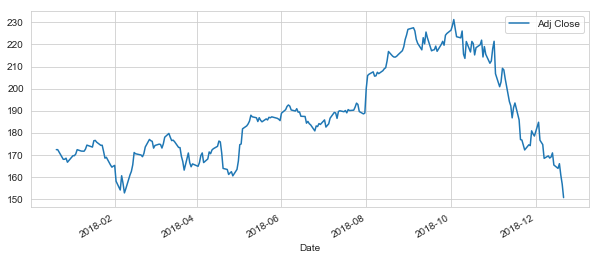

In [24]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

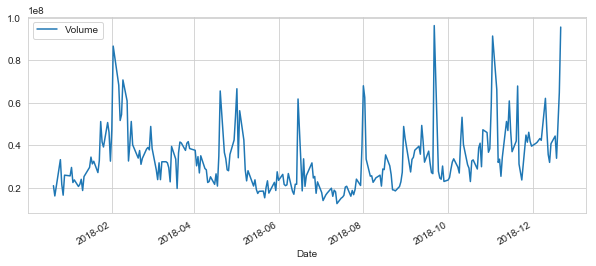

In [29]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [34]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [35]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2017-12-21,176.020004,174.100006,174.169998,175.009995,20949900.0,172.421402,NaN,NaN,NaN
2017-12-22,175.419998,174.500000,174.679993,175.009995,16114600.0,172.421402,NaN,NaN,NaN
2017-12-26,171.470001,169.679993,170.800003,170.570007,33185500.0,168.047089,NaN,NaN,NaN
2017-12-27,170.779999,169.710007,170.100006,170.600006,21498200.0,168.076645,NaN,NaN,NaN
2017-12-28,171.850006,170.479996,171.000000,171.080002,16480200.0,168.549545,NaN,NaN,NaN


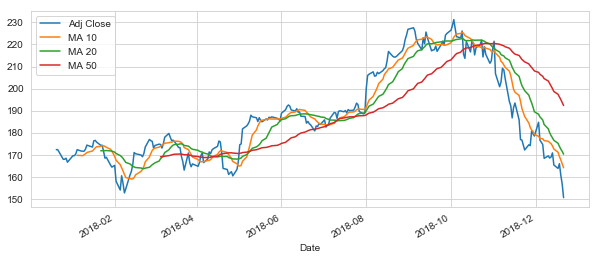

In [37]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False,figsize=(10,4))

In [38]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [39]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2017-12-21,176.020004,174.100006,174.169998,175.009995,20949900.0,172.421402,NaN,NaN,NaN,NaN
2017-12-22,175.419998,174.500000,174.679993,175.009995,16114600.0,172.421402,NaN,NaN,NaN,0.000000
2017-12-26,171.470001,169.679993,170.800003,170.570007,33185500.0,168.047089,NaN,NaN,NaN,-0.025370
2017-12-27,170.779999,169.710007,170.100006,170.600006,21498200.0,168.076645,NaN,NaN,NaN,0.000176
2017-12-28,171.850006,170.479996,171.000000,171.080002,16480200.0,168.549545,NaN,NaN,NaN,0.002814


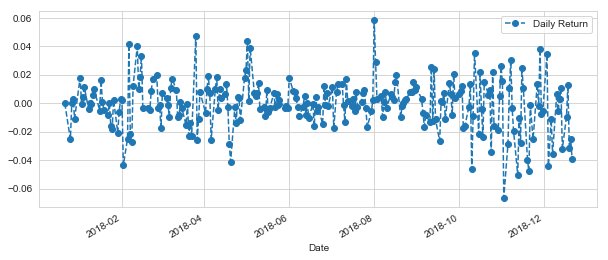

In [41]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


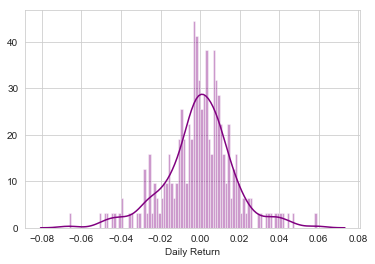

In [43]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

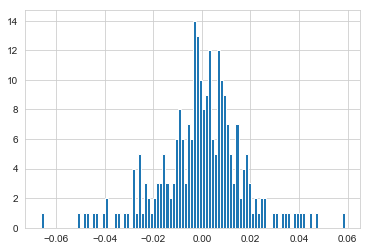

In [44]:
AAPL['Daily Return'].hist(bins=100)

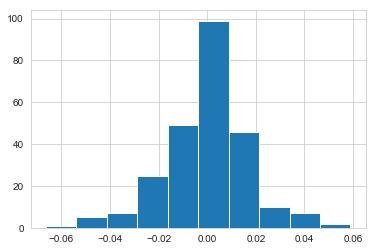

In [45]:
AAPL['Daily Return'].hist(bins=10)

In [46]:
closing_df = pdr.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [47]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-21,172.421402,1174.760010,1063.630005,84.045067
2017-12-22,172.421402,1168.359985,1060.119995,84.054901
2017-12-26,168.047089,1176.760010,1056.739990,83.946770
2017-12-27,168.076645,1182.260010,1049.369995,84.251495
2017-12-28,168.549545,1186.099976,1048.140015,84.261330


In [48]:
tech_rets = closing_df.pct_change()

In [50]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-21,NaN,NaN,NaN,NaN
2017-12-22,0.000000,-0.005448,-0.003300,0.000117
2017-12-26,-0.025370,0.007190,-0.003188,-0.001286
2017-12-27,0.000176,0.004674,-0.006974,0.003630
2017-12-28,0.002814,0.003248,-0.001172,0.000117


/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


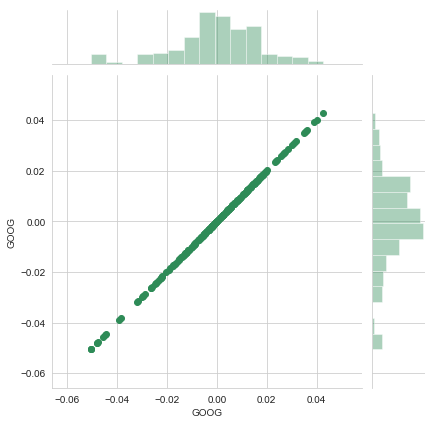

In [51]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


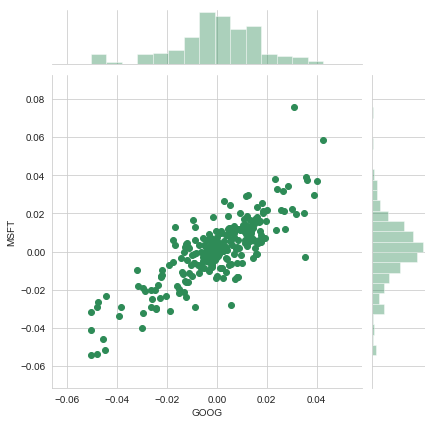

In [52]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

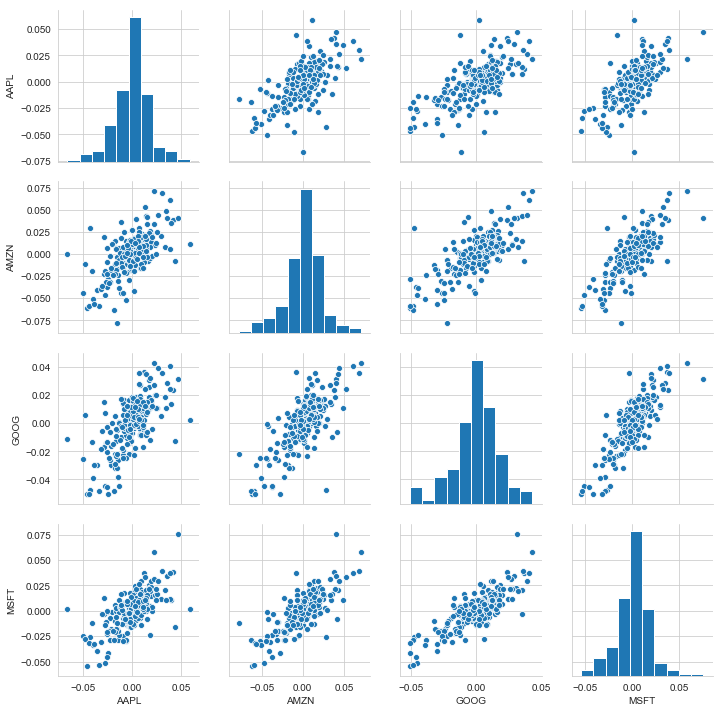

In [53]:
sns.pairplot(tech_rets.dropna())

/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cmp'
  s)
/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cmp'
  s)
/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cmp'
  s)
/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The foll

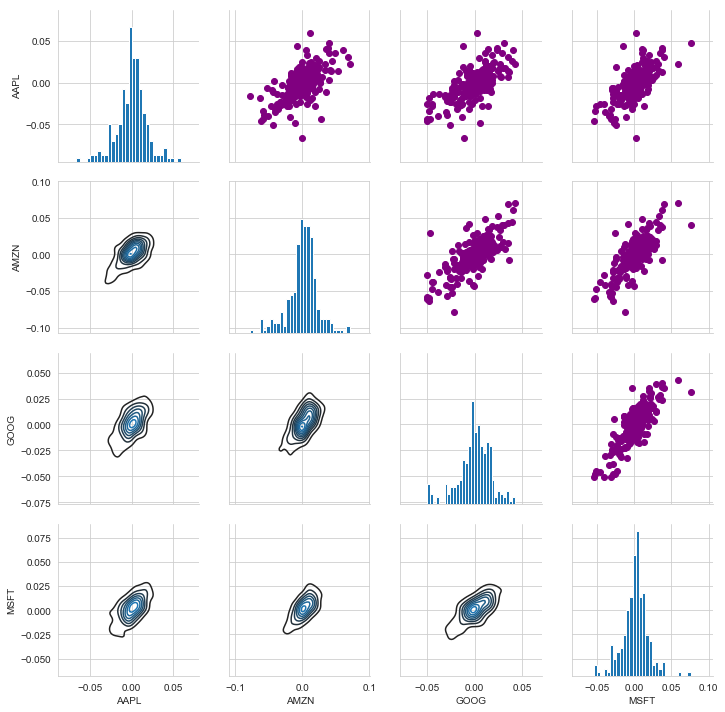

In [54]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmp='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cmp'
  s)
/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cmp'
  s)
/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'cmp'
  s)
/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The foll

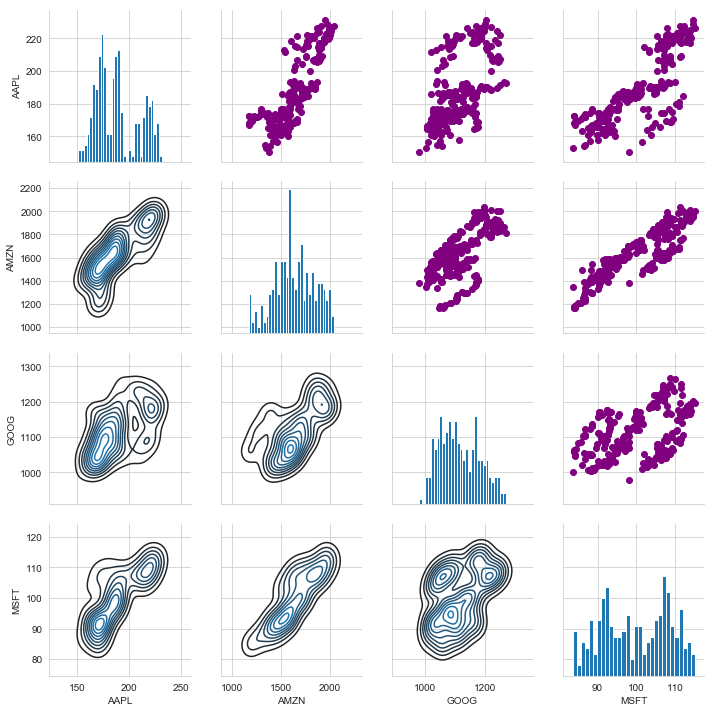

In [55]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmp='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

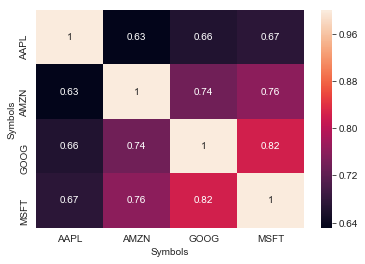

In [56]:
sns.heatmap(tech_rets.corr(), annot=True)

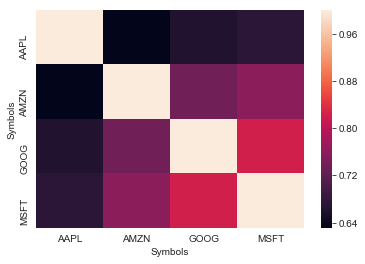

In [57]:
sns.heatmap(tech_rets.corr(), annot=False)

In [58]:
rets = tech_rets.dropna()

In [62]:
rets.head()
type(rets)

pandas.core.frame.DataFrame

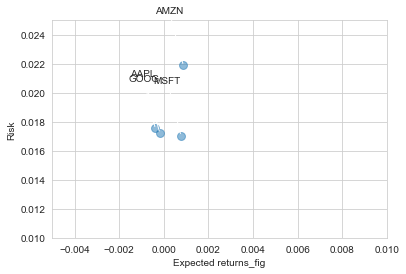

In [70]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=np.pi*20)
plt.ylim([0.01,0.025])
plt.xlim([-0.005,0.01])

plt.xlabel('Expected returns_fig')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                  textcoords='offset points', ha='right',va='bottom',
                  arrowprops=dict(arrowstyle='-',connectionstyle='arc3'))
    #線が白くなってしまった。色の変え方を再考。。あと、最近の平均とリスクは比例しないのね

/Users/onishiryoya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


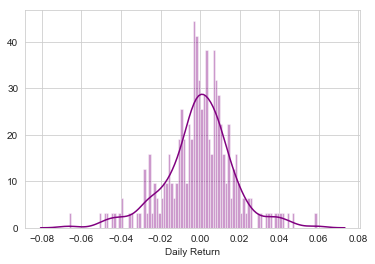

In [71]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [73]:
rets['AAPL'].quantile(0.05)

-0.029790000546664863

In [75]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [79]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma* np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        return price
        

In [80]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-21,1069.329956,1061.793945,1064.949951,1063.630005,995700,1063.630005
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900,1049.369995
2017-12-28,1054.750000,1044.770020,1051.599976,1048.140015,837100,1048.140015


(500, 550)

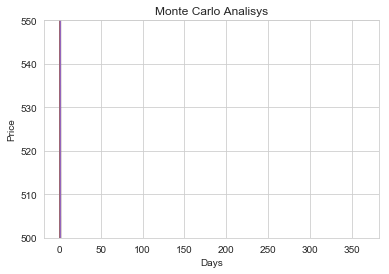

In [83]:
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analisys')
plt.ylim(500,550)